<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/czyzewska/Uczenie_nienadzorowane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

df = pd.read_csv('countries_of_the_world.csv')
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [2]:
float_columns = [
    'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
    'Net migration', 'Infant mortality (per 1000 births)',
    'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
    'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
    'Agriculture', 'Industry', 'Service'
]


In [3]:
df[float_columns] = df[float_columns].astype(str)

for col in float_columns:
    df[col] = df[col].str.replace(',', '.').replace(['nan', ''], np.nan).astype(float)

for col in float_columns:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

df.head(4)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.150844,0.282711,0.565283


In [4]:
nan_count_per_column = df.isna().sum()  # Liczba `NaN` w każdej kolumnie
print(nan_count_per_column)

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


In [5]:
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [6]:
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [7]:
countries = df["Country"]

In [8]:
df.drop(['Country'], axis=1, inplace=True)

In [9]:

le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

In [10]:
df.head(3)

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,3,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,6,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298


In [11]:
df.dtypes


Region                                  int64
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [12]:
df = df.replace(",", ".", regex=True)
columns = df.columns
for i in range(1, len(columns)):
  df[columns[i]] = df[columns[i]].apply(pd.to_numeric)

In [13]:
numeric_columns = df.select_dtypes(include=['number']).columns

column_means = df[numeric_columns].mean()

df.fillna(column_means, inplace=True)

In [14]:
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


In [15]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)
kmeans.labels_

array([1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0,
       1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1], dtype=int32)

In [17]:
df_countries = pd.read_csv('countries_of_the_world.csv')

In [18]:
df_countries = pd.DataFrame()
df_countries["Country"] = countries
df_countries["Label"] = kmeans.labels_

In [19]:
## Sprawdzenie gdzie należy Polska
df_countries.loc[df_countries["Country"] == "Poland "]["Label"]

163    0
Name: Label, dtype: int32

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

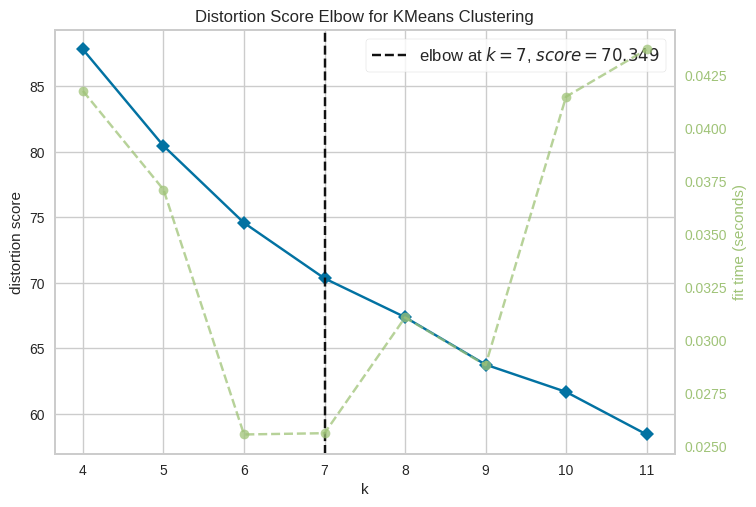

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
X = df
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


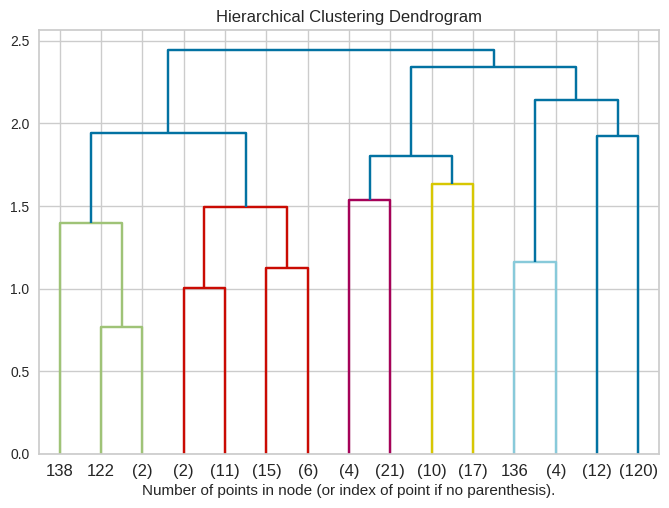

In [21]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# Funkcja do rysowania dendrogramu
def plot_dendrogram(model, **kwargs):
    # Utwórz tablicę z liczbą elementów w każdym węźle
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    # Oblicz liczby elementów w węzłach
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # liść
            else:
                current_count += counts[child_idx - n_samples]  # węzeł wewnętrzny
        counts[i] = current_count

    # Utwórz macierz połączeń dla dendrogramu
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Rysuj dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(
    distance_threshold=0,
    n_clusters=None,
    affinity='euclidean', #can be manhattan as well
    linkage='complete'  # 'ward', 'single', or 'average'
)
model.fit(df)

# Rysowanie dendrogramu
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)  # Trzy poziomy
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()